# DATA SCIENCE INTERN @ OASIS INFOBYTE
## AUTHOR : RITIKA ROY CHOWDHURY
# TASK 5 : SALES PREDICTION USING PYTHON

## Installing Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Datasets

In [4]:
df=pd.read_csv(r"Downloads\advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


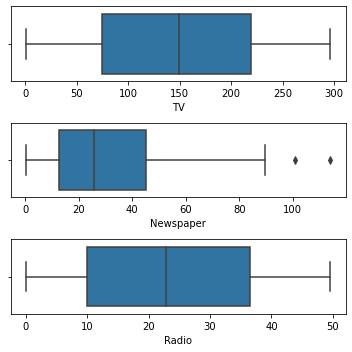

In [9]:
fig,axs=plt.subplots(3,figsize=(5,5))
plt1=sns.boxplot(df['TV'],ax=axs[0])
plt2=sns.boxplot(df['Newspaper'],ax=axs[1])
plt3=sns.boxplot(df['Radio'],ax=axs[2])
plt.tight_layout()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


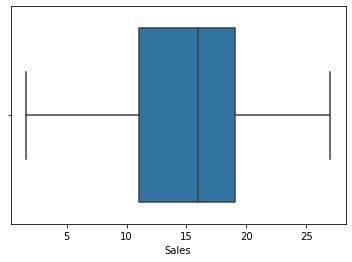

In [10]:
sns.boxplot(df['Sales'])
plt.show()

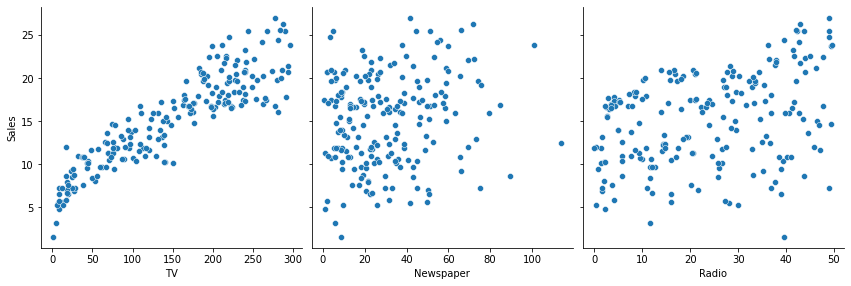

In [11]:
sns.pairplot(df,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',height=4,aspect=1,kind='scatter')
plt.show()

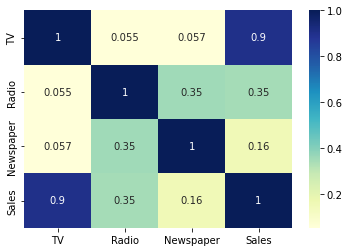

In [12]:
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [13]:
x=df['TV']
y=df['Sales']

In [14]:
x

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [15]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.2,random_state=100)

In [18]:
X_train.head()

168    215.4
112    175.7
171    164.5
181    218.5
7      120.2
Name: TV, dtype: float64

In [19]:
y_train.head()

168    17.1
112    17.1
171    17.5
181    17.2
7      13.2
Name: Sales, dtype: float64

In [20]:
import statsmodels.api as sm

In [21]:
X_train_sm=sm.add_constant(X_train)

In [22]:
lr=sm.OLS(y_train,X_train_sm).fit()
lr.params

const    7.13982
TV       0.05252
dtype: float64

In [23]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     626.0
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           3.91e-53
Time:                        18:37:12   Log-Likelihood:                -313.62
No. Observations:                 140   AIC:                             631.2
Df Residuals:                     138   BIC:                             637.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1398      0.363     19.676      0.0

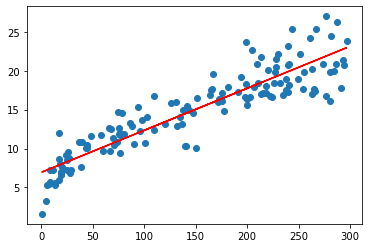

In [24]:
plt.scatter(X_train,y_train)
plt.plot(X_train,6.948+0.054*X_train,'r')
plt.show()

In [25]:
y_train_pred=lr.predict(X_train_sm)
res=(y_train-y_train_pred)

In [26]:
y_train_pred=lr.predict(X_train_sm)
res=(y_train-y_train_pred)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


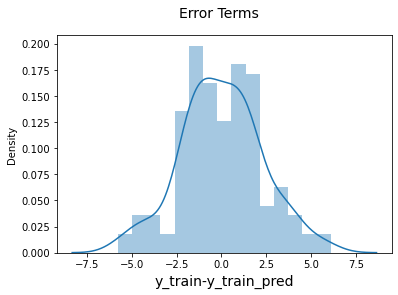

In [27]:
fig=plt.figure()
sns.distplot(res,bins=15)
fig.suptitle('Error Terms',fontsize=14)
plt.xlabel('y_train-y_train_pred',fontsize=14)
plt.show()

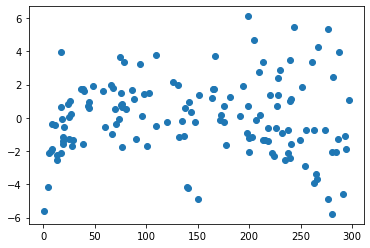

In [28]:
plt.scatter(X_train,res)
plt.show()

In [29]:
X_test_sm=sm.add_constant(X_test)
y_pred=lr.predict(X_test_sm)

In [30]:
y_pred.head()

126     7.549476
104    19.650072
99     14.240517
92     18.573413
111    19.833892
dtype: float64

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [32]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.3843591400329873

In [33]:
r_squared=r2_score(y_test,y_pred)
r_squared

0.7110225731872046

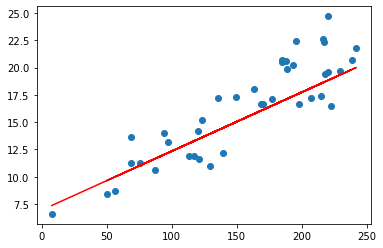

In [34]:
plt.scatter(X_test,y_test)
plt.plot(X_test,6.948+0.054*X_test,'r')
plt.show()

# THANK YOU